# Tableau Homework - Citi Bike Analytics

Since 2013, the Citi Bike Program has implemented a robust infrastructure for collecting data on the program's utilization. Through the team's efforts, each month bike data is collected, organized, and made public on the Citi Bike Data [webpage](https://www.citibikenyc.com/system-data)

Task
Your task in this assignment is to aggregate the data found in the Citi Bike Trip History Logs and find two unexpected phenomena.

Design 2-5 visualizations for each discovered phenomena (4-10 total). You may work with a timespan of your choosing. Optionally, you may merge multiple datasets from different periods.

### Import Dependencies

In [1]:
import os
import pandas as pd

### Import and clean the data

In [2]:
directory = "JC-2018-2020"
filepath = os.path.join(directory,"JC-202011-citibike-tripdata.csv")
print(filepath)

JC-2018-2020\JC-202011-citibike-tripdata.csv


In [3]:
# df = pd.read_csv(filepath)

In [4]:
# Get list of files on the directory
files_list = [];
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        files_list.append(os.path.join(filename))

    else:
        continue

In [5]:
df_merged = pd.DataFrame({'A' : []})

In [6]:
n = 0
for file in files_list:
    if n == 0:
        filepath = os.path.join(directory,file)
        df_merged = pd.read_csv(filepath)
    else:
        filepath = os.path.join(directory,file)
        df = pd.read_csv(filepath)
        df_merged = pd.merge(df, df_merged, how='outer')
    
    n += 1

In [7]:
df_merged

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime.1
0,756,2020-11-01 00:11:32.6250,2020-11-01 00:24:09.5850,3275,Columbus Drive,40.718355,-74.038914,3225,Baldwin at Montgomery,40.723659,-74.064194,42436,Subscriber,1984.0,1,NaN
1,584,2020-11-01 00:14:20.4820,2020-11-01 00:24:04.7820,3681,Grand St,40.715178,-74.037683,3209,Brunswick St,40.724176,-74.050656,46532,Customer,1969.0,0,NaN
2,403,2020-11-01 00:22:55.8820,2020-11-01 00:29:39.0950,3203,Hamilton Park,40.727596,-74.044247,3483,Montgomery St,40.719420,-74.050990,35139,Subscriber,1980.0,1,NaN
3,498,2020-11-01 00:41:37.4270,2020-11-01 00:49:55.7010,3268,Lafayette Park,40.713464,-74.062859,3213,Van Vorst Park,40.718489,-74.047727,46539,Customer,1969.0,0,NaN
4,151,2020-11-01 00:53:21.2340,2020-11-01 00:55:52.8060,3185,City Hall,40.717733,-74.043845,3276,Marin Light Rail,40.714584,-74.042817,44388,Subscriber,1986.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164293,358,2017-12-31 20:25:06,2017-12-31 20:31:04,3278,Monmouth and 6th,40.725685,-74.048790,3185,City Hall,40.717732,-74.043845,31938,Subscriber,1987.0,2,2017-12-31 20:25:06
2164294,354,2017-12-31 20:25:06,2017-12-31 20:31:01,3278,Monmouth and 6th,40.725685,-74.048790,3185,City Hall,40.717732,-74.043845,29604,Subscriber,1986.0,1,2017-12-31 20:25:06
2164295,345,2017-12-31 21:06:52,2017-12-31 21:12:38,3639,Harborside,40.719252,-74.034234,3202,Newport PATH,40.727224,-74.033759,31762,Subscriber,1991.0,1,2017-12-31 21:06:52
2164296,972,2017-12-31 21:54:12,2017-12-31 22:10:25,3191,Union St,40.718211,-74.083639,3186,Grove St PATH,40.719586,-74.043117,29644,Subscriber,1987.0,2,2017-12-31 21:54:12


In [8]:
df_merged.isnull().sum()

tripduration                     0
starttime                        0
stoptime                         0
start station id                 0
start station name               0
start station latitude           0
start station longitude          0
end station id                   0
end station name                 0
end station latitude             0
end station longitude            0
bikeid                           0
usertype                         0
birth year                     676
gender                           0
starttime.1                1077904
dtype: int64

In [9]:
df_merged.isnull().values.any()

True

In [10]:
# df_merged.to_csv(os.path.join(directory,"JC-2017-2020-merged.csv"))

In [11]:
nanlist = df_merged[df_merged['starttime'].isnull()]
nanlist

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime.1


In [12]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df_merged['starttime'])  
    
bool_series.describe()

count     2164298
unique          1
top         False
freq      2164298
Name: starttime, dtype: object

In [13]:
df_merged['birth year'].value_counts()

1969.0    196399
1988.0    115454
1989.0    111354
1987.0    105018
1986.0    102072
           ...  
1943.0         4
1938.0         2
1920.0         2
1905.0         2
1901.0         2
Name: birth year, Length: 79, dtype: int64

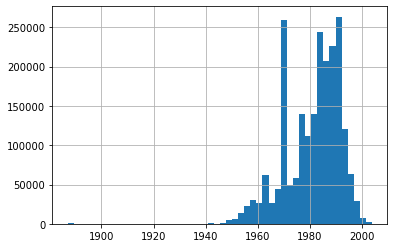

In [14]:
df_merged['birth year'].hist(bins=50)

In [15]:
df_merged[df_merged['birth year'] == 1969]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime.1
1,584,2020-11-01 00:14:20.4820,2020-11-01 00:24:04.7820,3681,Grand St,40.715178,-74.037683,3209,Brunswick St,40.724176,-74.050656,46532,Customer,1969.0,0,NaN
3,498,2020-11-01 00:41:37.4270,2020-11-01 00:49:55.7010,3268,Lafayette Park,40.713464,-74.062859,3213,Van Vorst Park,40.718489,-74.047727,46539,Customer,1969.0,0,NaN
9,645,2020-11-01 01:11:27.9150,2020-11-01 01:22:13.4440,3206,Hilltop,40.731169,-74.057574,3187,Warren St,40.721124,-74.038051,42590,Customer,1969.0,0,NaN
10,533,2020-11-01 01:17:46.1040,2020-11-01 01:26:39.5220,3194,McGinley Square,40.725340,-74.067622,3694,Jackson Square,40.711130,-74.078900,42465,Subscriber,1969.0,1,NaN
14,1032,2020-11-01 02:14:05.7170,2020-11-01 02:31:18.4820,3213,Van Vorst Park,40.718489,-74.047727,3277,Communipaw & Berry Lane,40.714358,-74.066611,42157,Customer,1969.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163464,403,2017-12-22 14:17:26,2017-12-22 14:24:09,3202,Newport PATH,40.727224,-74.033759,3211,Newark Ave,40.721525,-74.046305,29622,Subscriber,1969.0,1,2017-12-22 14:17:26
2163646,320,2017-12-23 16:54:51,2017-12-23 17:00:11,3203,Hamilton Park,40.727596,-74.044247,3202,Newport PATH,40.727224,-74.033759,31722,Subscriber,1969.0,1,2017-12-23 16:54:51
2163839,472,2017-12-26 13:11:08,2017-12-26 13:19:01,3202,Newport PATH,40.727224,-74.033759,3186,Grove St PATH,40.719586,-74.043117,31767,Subscriber,1969.0,1,2017-12-26 13:11:08
2163843,310,2017-12-26 13:34:55,2017-12-26 13:40:05,3202,Newport PATH,40.727224,-74.033759,3183,Exchange Place,40.716247,-74.033459,29640,Subscriber,1969.0,1,2017-12-26 13:34:55


### Analytics

* How many trips have been recorded total during the chosen period?

In [16]:
# How many trips have been recorded total during the chosen period?
total_trips = df_merged['tripduration'].count()
print(f"How many trips have been recorded total during the chosen period? \nR:{total_trips}")

How many trips have been recorded total during the chosen period? 
R:2164298


<hr style="border-top: 3px solid gray;">

* By what percentage has total ridership grown?

In [17]:
df_merged.index = pd.to_datetime(df_merged['starttime'],format='%Y-%m-%d')
df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year])
# df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year, df_merged.index.month])

In [18]:
df_grouped_year = df_grouped_starttime.count()
df_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime.1
starttime,,,,,,,,,,,,,,,,
2017,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,22630,23306,15898
2018,707784,707784,707784,707784,707784,707784,707784,707784,707784,707784,707784,707784,707784,707784,707784,353892
2019,809894,809894,809894,809894,809894,809894,809894,809894,809894,809894,809894,809894,809894,809894,809894,404947
2020,623314,623314,623314,623314,623314,623314,623314,623314,623314,623314,623314,623314,623314,623314,623314,311657


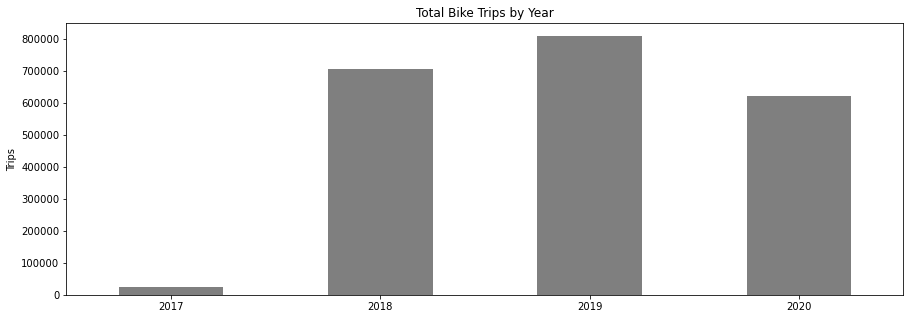

In [19]:
ax = df_grouped_year['tripduration'].plot(kind="bar",color="black", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Total Bike Trips by Year");

In [20]:
growth_2019 = df_grouped_year['tripduration'].iloc[1] / df_grouped_year['tripduration'].iloc[0]
growth_2020 = df_grouped_year['tripduration'].iloc[2] / df_grouped_year['tripduration'].iloc[1]

In [21]:
print(f"Growth 2019: {round(growth_2019*100)}%")
print(f"Growth 2020*: {round(growth_2020*100)}%")
print("\n* for 2020 still missing December")

Growth 2019: 3037.0%
Growth 2020*: 114.0%

* for 2020 still missing December


<hr style="border-top: 3px solid gray;">

* How has the proportion of short-term customers and annual subscribers changed?

In [22]:
df_Subscriber = df_merged.loc[df_merged['usertype'] == 'Subscriber']
df_Subscriber_grouped_year = df_Subscriber.groupby(by=[ df_Subscriber.index.year]).count()
df_Subscriber_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime.1
starttime,,,,,,,,,,,,,,,,
2017,22950,22950,22950,22950,22950,22950,22950,22950,22950,22950,22950,22950,22950,22587,22950,15673
2018,663450,663450,663450,663450,663450,663450,663450,663450,663450,663450,663450,663450,663450,663450,663450,331725
2019,723842,723842,723842,723842,723842,723842,723842,723842,723842,723842,723842,723842,723842,723842,723842,361921
2020,425930,425930,425930,425930,425930,425930,425930,425930,425930,425930,425930,425930,425930,425930,425930,212965


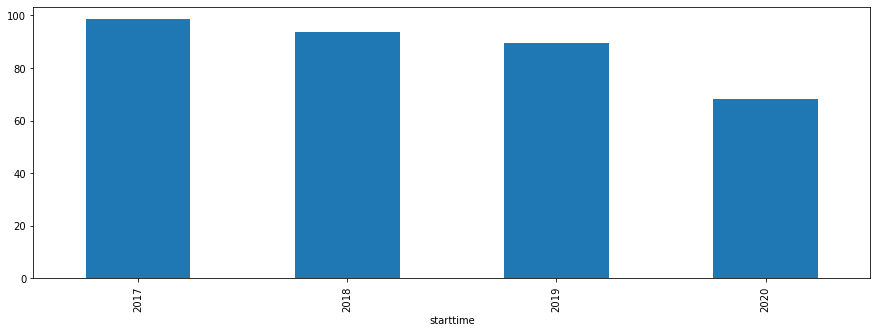

In [23]:
subscriber_to_total = 100*df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration']
subscriber_to_total.plot(kind='bar',figsize=(15, 5))

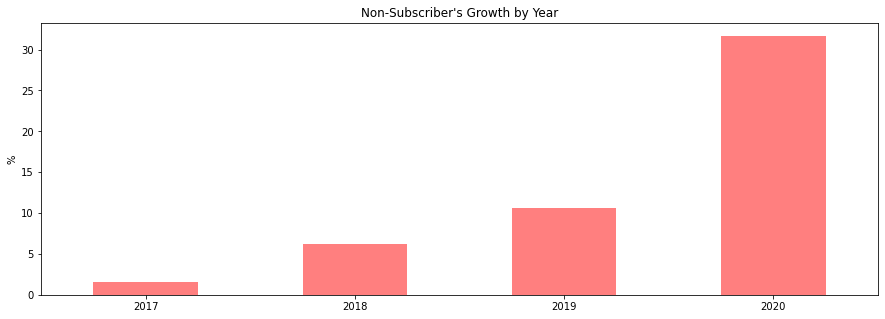

In [24]:
customer_to_total = 100*(1-df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration'])
ax = customer_to_total.plot(kind='bar',color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("%");
ax.set_title("Non-Subscriber's Growth by Year");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during summer months?

In [25]:
# summer (June, July, August)
df_resampled_year = df_merged['starttime'].resample('Y')
df_resampled_year


In [26]:
df_resampled_year.count()

starttime
2017-12-31     23306
2018-12-31    707784
2019-12-31    809894
2020-12-31    623314
Freq: A-DEC, Name: starttime, dtype: int64

In [27]:
df_resampled_by_hour = df_merged['starttime'].resample('H').count()

In [28]:
df_resampled_by_hour

starttime
2017-12-01 00:00:00    10
2017-12-01 01:00:00     0
2017-12-01 02:00:00     4
2017-12-01 03:00:00     4
2017-12-01 04:00:00    14
                       ..
2020-11-30 19:00:00    50
2020-11-30 20:00:00    24
2020-11-30 21:00:00    28
2020-11-30 22:00:00    16
2020-11-30 23:00:00    10
Freq: H, Name: starttime, Length: 26304, dtype: int64

In [29]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-06-01")]

In [30]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour_summer_2018.loc[(df_resampled_by_hour_summer_2018.index < "2018-09-01")]

In [31]:
df_summer_2018 = pd.DataFrame(df_resampled_by_hour_summer_2018.resample('H').sum())

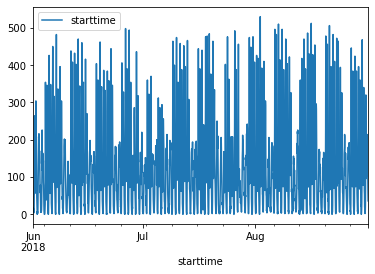

In [32]:
df_summer_2018.plot()

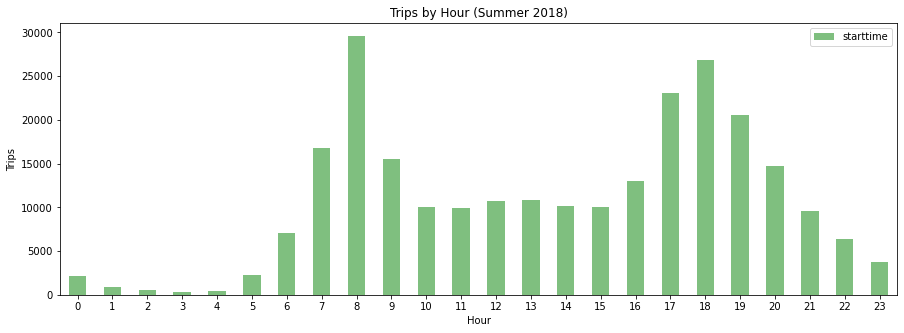

In [33]:
ax = df_summer_2018.groupby(by=[ df_summer_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2018)");

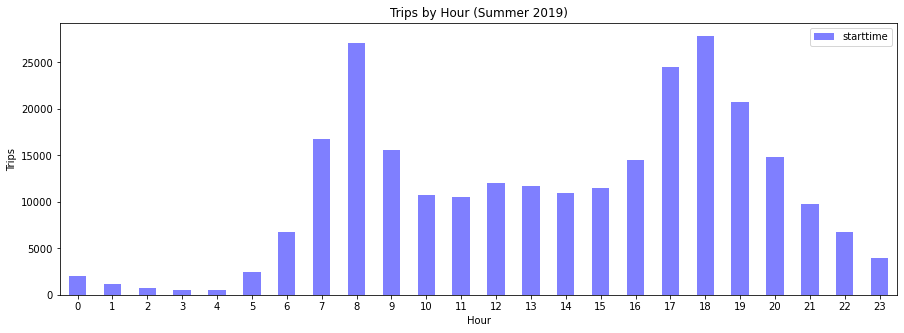

In [34]:
df_resampled_by_hour_summer_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-06-01")]
df_resampled_by_hour_summer_2019 = df_resampled_by_hour_summer_2019.loc[(df_resampled_by_hour_summer_2019.index < "2019-09-01")]
df_summer_2019 = pd.DataFrame(df_resampled_by_hour_summer_2019.resample('H').sum())
ax = df_summer_2019.groupby(by=[ df_summer_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2019)");

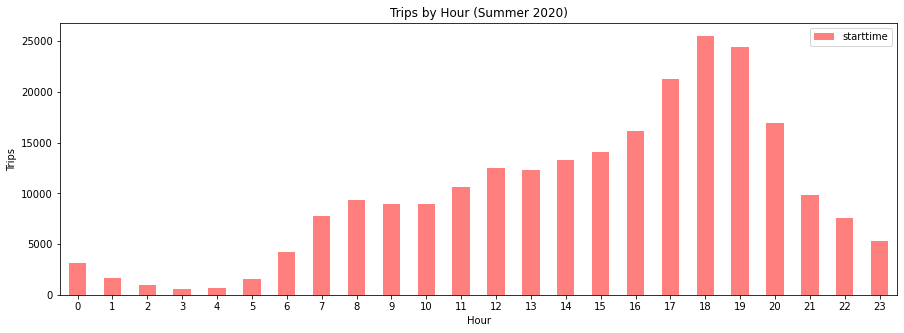

In [35]:
df_resampled_by_hour_summer_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-06-01")]
df_resampled_by_hour_summer_2020 = df_resampled_by_hour_summer_2020.loc[(df_resampled_by_hour_summer_2020.index < "2020-09-01")]
df_summer_2020 = pd.DataFrame(df_resampled_by_hour_summer_2020.resample('H').sum())
ax = df_summer_2020.groupby(by=[ df_summer_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2020)");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during winter months?

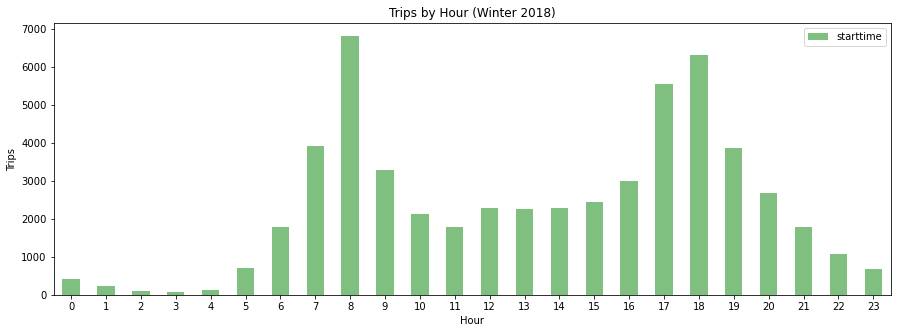

In [36]:
df_resampled_by_hour_winter_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-01-01")]
df_resampled_by_hour_winter_2018 = df_resampled_by_hour_winter_2018.loc[(df_resampled_by_hour_winter_2018.index < "2018-03-01")]
df_winter_2018 = pd.DataFrame(df_resampled_by_hour_winter_2018.resample('H').sum())
ax = df_winter_2018.groupby(by=[ df_winter_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2018)");

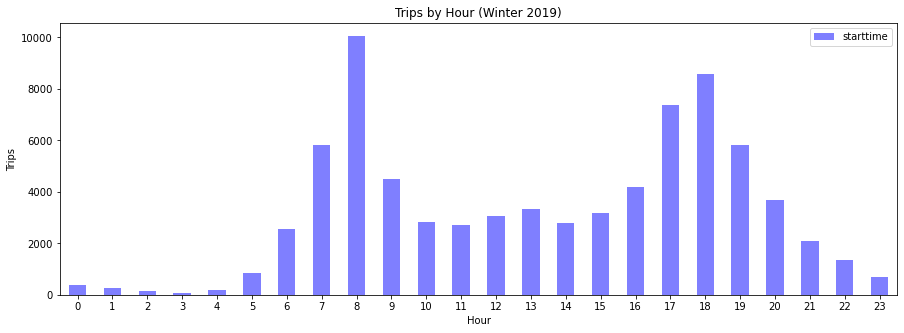

In [37]:
df_resampled_by_hour_winter_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-01-01")]
df_resampled_by_hour_winter_2019 = df_resampled_by_hour_winter_2019.loc[(df_resampled_by_hour_winter_2019.index < "2019-03-01")]
df_winter_2019 = pd.DataFrame(df_resampled_by_hour_winter_2019.resample('H').sum())
ax = df_winter_2019.groupby(by=[ df_winter_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2019)");

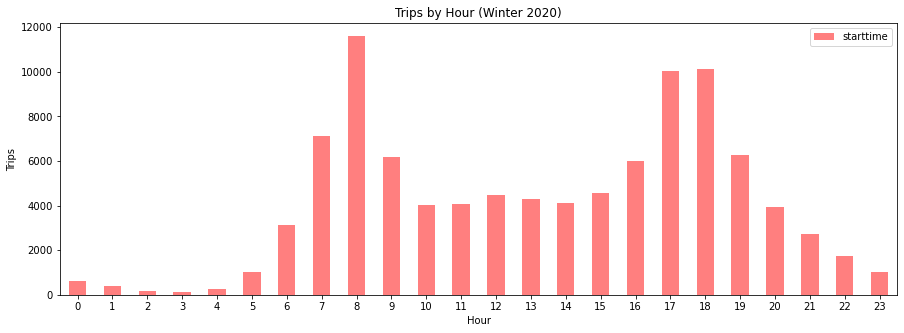

In [38]:
df_resampled_by_hour_winter_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-01-01")]
df_resampled_by_hour_winter_2020 = df_resampled_by_hour_winter_2020.loc[(df_resampled_by_hour_winter_2020.index < "2020-03-01")]
df_winter_2020 = pd.DataFrame(df_resampled_by_hour_winter_2020.resample('H').sum())
ax = df_winter_2020.groupby(by=[ df_winter_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2020)");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for starting a journey? (Based on data, why do you hypothesize these are the top locations?)

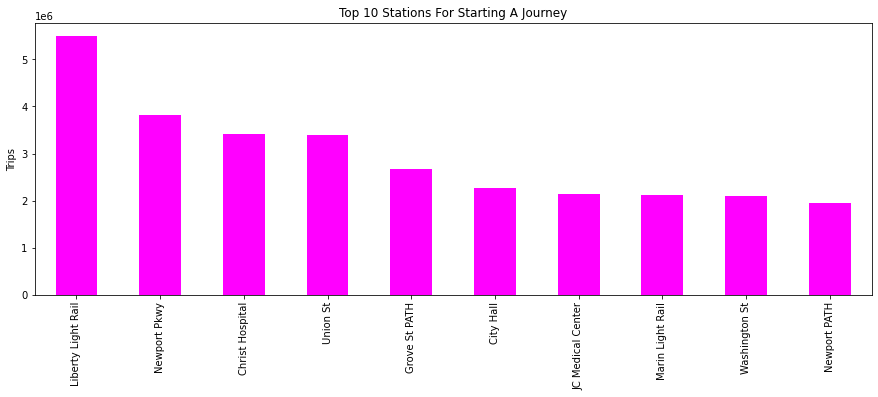

In [39]:
top10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_start_stations['tripduration'].plot(kind="bar", color="fuchsia", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for ending a journey? (Based on data, why?)

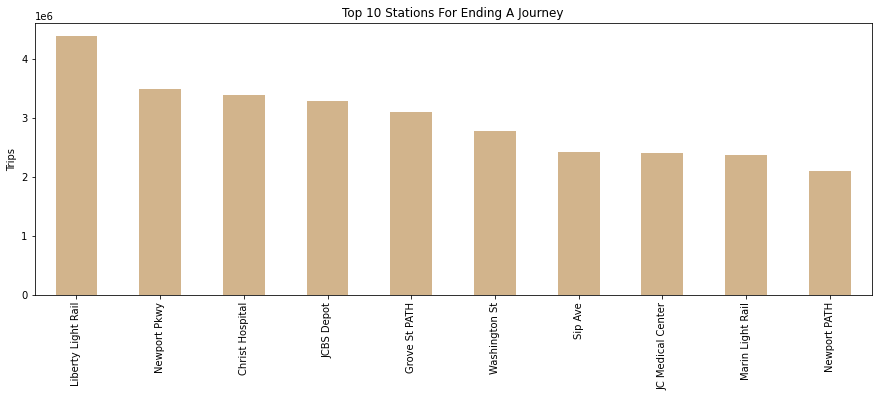

In [40]:
top10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_ending_stations['tripduration'].plot(kind="bar", color="tan", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for starting a journey? (Based on data, why?)

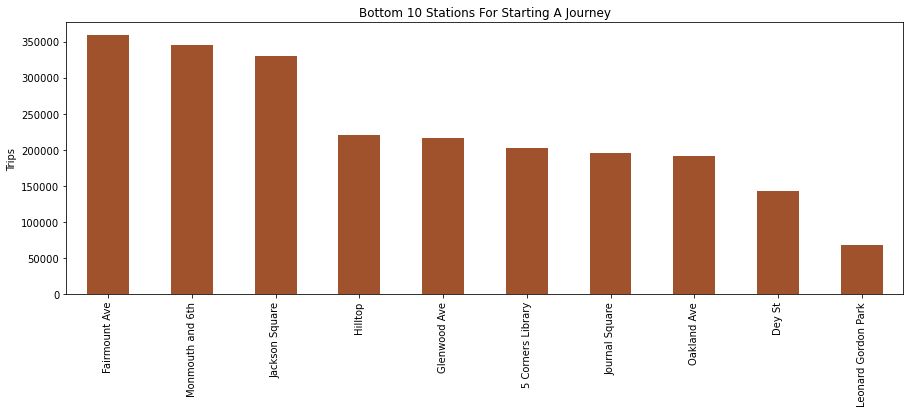

In [41]:
bottom10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_start_stations['tripduration'].plot(kind="bar", color="sienna", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for ending a journey (Based on data, why?)

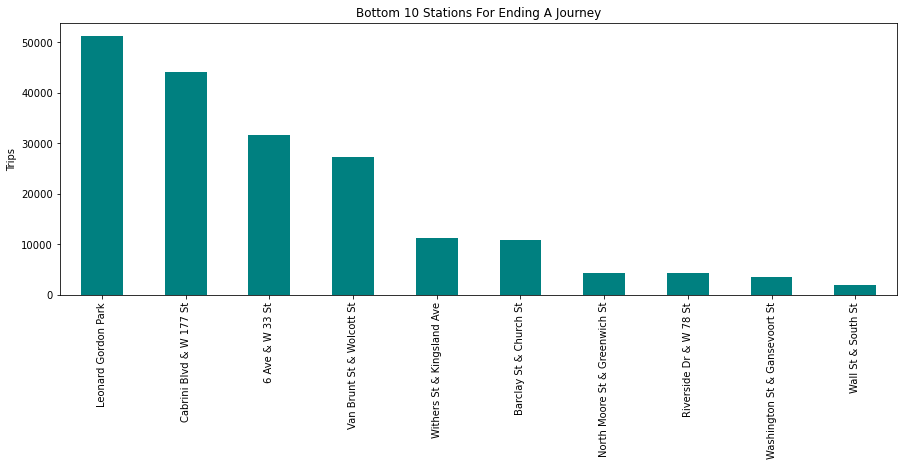

In [42]:
bottom10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_ending_stations['tripduration'].plot(kind="bar", color="teal", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what is the gender breakdown of active participants (Male v. Female)?

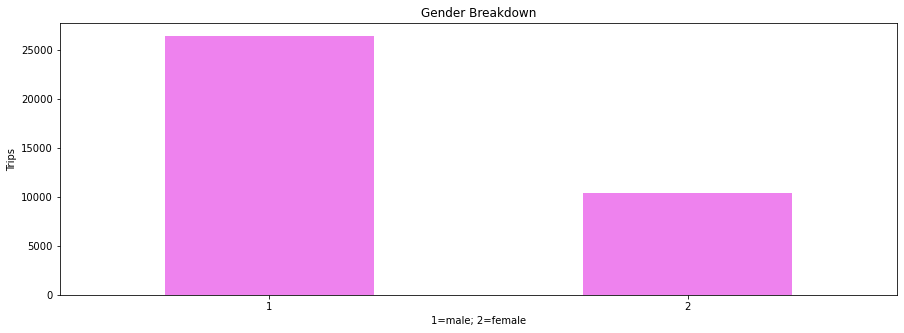

In [43]:
gender_breakdown = df_merged.loc[(df_merged.index >= "2020-11-01") & (df_merged.gender != 0)].groupby("gender")
ax = gender_breakdown['tripduration'].count().plot(kind="bar", rot=0,color="violet", alpha=1,figsize=(15, 5))
ax.set_xlabel("1=male; 2=female");
ax.set_ylabel("Trips");
ax.set_title("Gender Breakdown");

<hr style="border-top: 3px solid gray;">

* How effective has gender outreach been in increasing female ridership over the timespan?

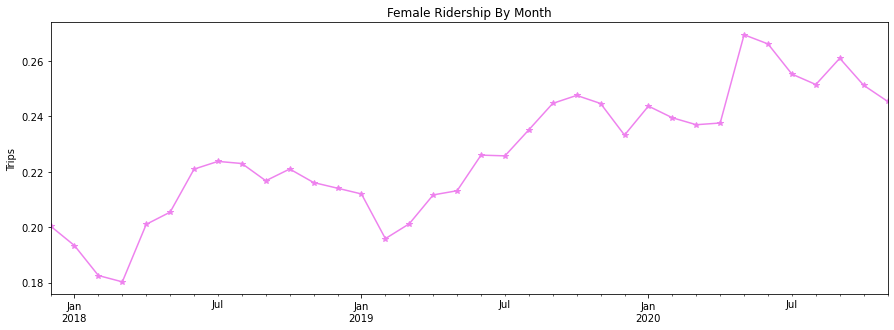

In [44]:
female_ridership_by_month = df_merged['tripduration'].loc[(df_merged.gender == 2)].resample("M").count() / df_merged['tripduration'].resample("M").count()
ax = female_ridership_by_month.plot(color="violet",marker='*', alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Female Ridership By Month");

<hr style="border-top: 3px solid gray;">

* How does the average trip duration change by age?

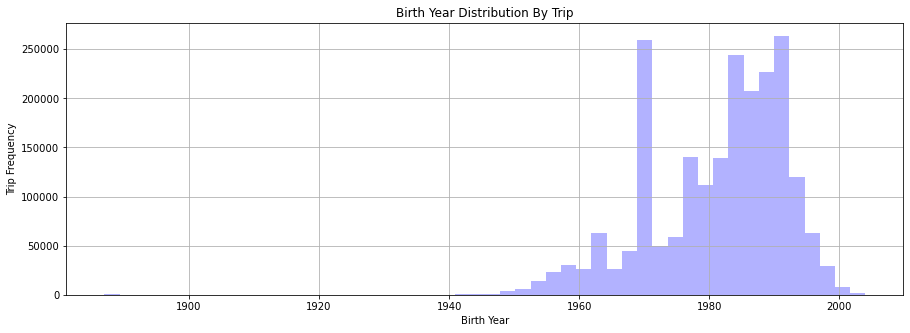

In [61]:
ax = df_merged['birth year'].hist(bins=50,color="b", alpha=.3,figsize=(15, 5))
ax.set_xlabel("Birth Year");
ax.set_ylabel("Trip Frequency");
ax.set_title("Birth Year Distribution By Trip");

In [45]:
df_grouped_age = df_merged.groupby("birth year")

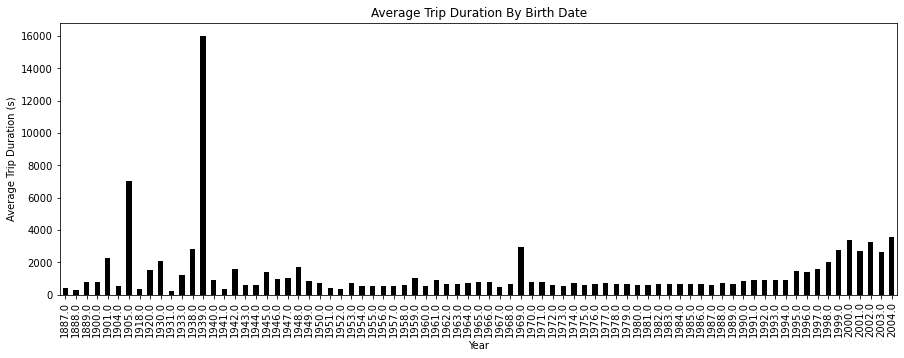

In [46]:
ax = df_grouped_age['tripduration'].mean().plot(kind="bar",color="k", alpha=1,figsize=(15, 5))
ax.set_xlabel("Year");
ax.set_ylabel("Average Trip Duration (s)");
ax.set_title("Average Trip Duration By Birth Date");

In [47]:
df_grouped_age_usertype = df_merged.groupby(["birth year","usertype"]).count()

In [48]:
df_grouped_age_usertype

tripduration  starttime  stoptime  start station id  \
birth year usertype                                                          
1887.0     Subscriber            43         43        43                43   
1888.0     Customer               4          4         4                 4   
           Subscriber           516        516       516               516   
1889.0     Customer               8          8         8                 8   
1900.0     Customer               4          4         4                 4   
...                             ...        ...       ...               ...   
2002.0     Customer            1164       1164      1164              1164   
           Subscriber            94         94        94                94   
2003.0     Customer             358        358       358               358   
           Subscriber           148        148       148               148   
2004.0     Customer              50         50        50                50   

                       start station name  start station latitude  \
birth year usertype                                                 
1887.0     Subscriber                  43                      43   
1888.0     Customer                     4                       4   
           Subscriber                 516                     516   
1889.0     Customer                     8                       8   
1900.0     Customer                     4                       4   
...                                   ...                     ...   
2002.0     Customer                  1164                    1164   
           Subscriber                  94                      94   
2003.0     Customer                   358                     358   
           Subscriber                 148                     148   
2004.0     Customer                    50                      50   

                       start station longitude  end station id  \
birth year usertype                                              
1887.0     Subscriber                       43              43   
1888.0     Customer                          4               4   
           Subscriber                      516             516   
1889.0     Customer                          8               8   
1900.0     Customer                          4               4   
...                                        ...             ...   
2002.0     Customer                       1164            1164   
           Subscriber                       94              94   
2003.0     Customer                        358             358   
           Subscriber                      148             148   
2004.0     Customer                         50              50   

                       end station name  end station latitude  \
birth year usertype                                             
1887.0     Subscriber                43                    43   
1888.0     Customer                   4                     4   
           Subscriber               516                   516   
1889.0     Customer                   8                     8   
1900.0     Customer                   4                     4   
...                                 ...                   ...   
2002.0     Customer                1164                  1164   
           Subscriber                94                    94   
2003.0     Customer                 358                   358   
           Subscriber               148                   148   
2004.0     Customer                  50                    50   

                       end station longitude  bikeid  gender  starttime.1  
birth year usertype                                                        
1887.0     Subscriber                     43      43      43           23  
1888.0     Customer                        4       4       4            2  
           Subscriber                    516     516     516          258  
1889.0     Customer      

<hr style="border-top: 3px solid gray;">

* What is the average distance in miles that a bike is ridden?

In [77]:
from geopy.distance import geodesic

origin = (df_merged['start station latitude'].iloc[0], df_merged['start station longitude'].iloc[0])
dist = (df_merged['end station latitude'].iloc[0], df_merged['end station longitude'].iloc[0])
print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")

Distance is 1.38 miles


In [ ]:
list_distances = []
for index in range(len(df_merged.index)):
    origin = (df_merged['start station latitude'].iloc[index], df_merged['start station longitude'].iloc[index])
    dist = (df_merged['end station latitude'].iloc[index], df_merged['end station longitude'].iloc[index])
#     print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")
    list_distances.append(round(100*geodesic(origin, dist).miles)/100)

In [ ]:
average_distance = sum(list_distances)/len(list_distances)

<hr style="border-top: 3px solid gray;">

* Which bikes (by ID) are most likely due for repair or inspection in the timespan?

In [49]:
df_groupby = df_merged.groupby("bikeid")

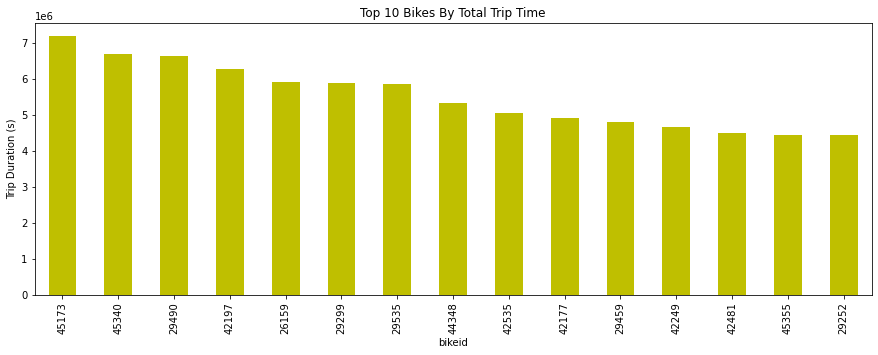

In [50]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=False).head(15).plot(kind="bar", color="y", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Top 10 Bikes By Total Trip Time");

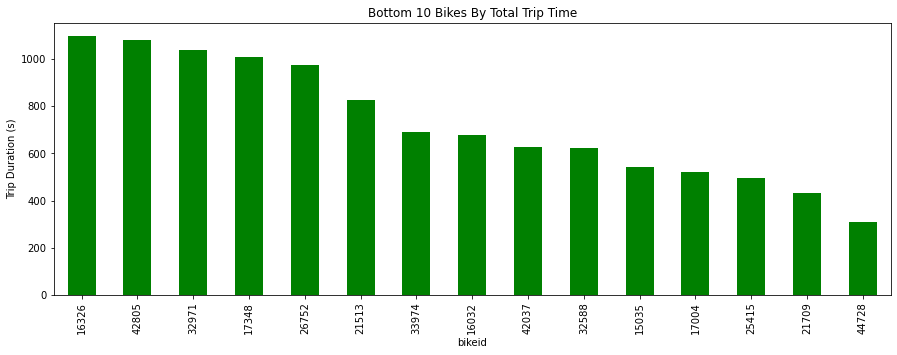

In [51]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=True).head(15).sort_values(ascending=False).plot(kind="bar", color="g", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Bottom 10 Bikes By Total Trip Time");

<hr style="border-top: 3px solid gray;">

* How variable is the utilization by bike ID?

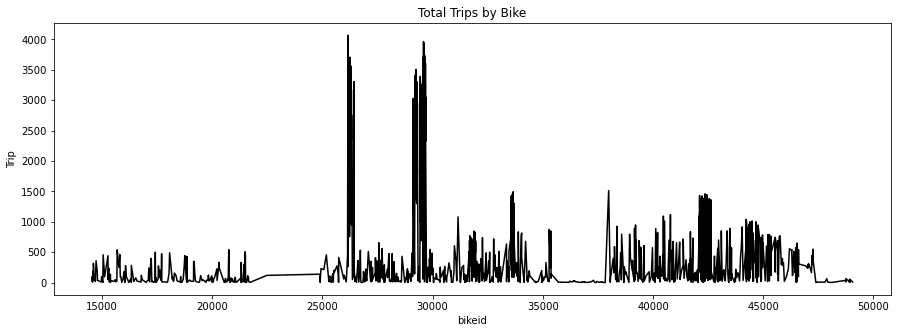

In [52]:
ax = df_groupby['tripduration'].count().plot(color="k", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip");
ax.set_title("Total Trips by Bike");

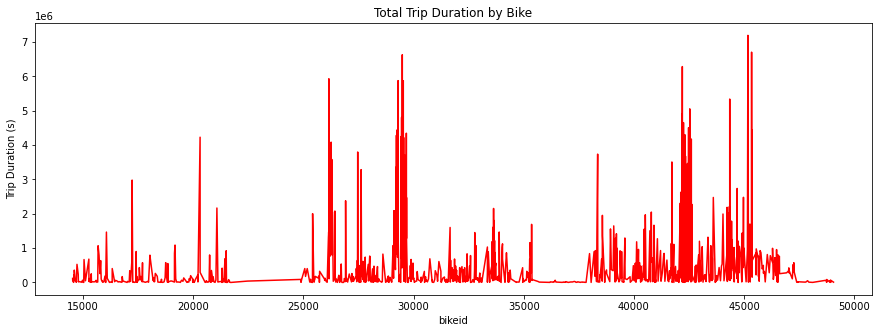

In [53]:
ax = df_groupby['tripduration'].sum().plot(color="r", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Total Trip Duration by Bike");

<hr style="border-top: 3px solid gray;">